# EM-DAT - Natural disasters
<a href="https://app.naas.ai/user-redirect/naas/downloader?url=https://raw.githubusercontent.com/jupyter-naas/awesome-notebooks/master/EM-DAT/EM-DAT_natural_disasters.ipynb" target="_parent">
<img src="https://img.shields.io/badge/-Open%20in%20Naas-success?labelColor=000000&logo="/>
</a>

In 1988, the Centre for Research on the Epidemiology of Disasters (CRED) launched the Emergency Events Database (EM-DAT). [EM-DAT](https://www.emdat.be/) was created with the initial support of the World Health Organisation (WHO) and the Belgian Government.

In [1]:
import pandas as pd
import plotly.express as px

## Input

In [60]:
df = pd.read_csv('path_to_your_file.csv')
df.head()

,Dis No,Year,Seq,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,Event Name,Entry Criteria,...,End Day,Total Deaths,No Injured,No Affected,No Homeless,Total Affected,Reconstruction Costs ('000 US$),Insured Damages ('000 US$),Total Damages ('000 US$),CPI
0,1971-0042-CHL,1971,42,Natural,Geophysical,Earthquake,Ground movement,NaN,NaN,Kill,...,9.0,85.0,451.0,2348522.0,NaN,2348973.0,NaN,NaN,236400.0,"15,8382546266338"
1,1971-0044-AFG,1971,44,Natural,Hydrological,Landslide,Landslide,NaN,NaN,Kill,...,28.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"15,8382546266338"
2,1971-9085-AFG,1971,9085,Natural,Climatological,Drought,Drought,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"15,8382546266338"
3,1971-0015-AUS,1971,15,Natural,Hydrological,Flood,Riverine flood,NaN,NaN,Kill,...,9.0,27.0,NaN,NaN,NaN,NaN,NaN,NaN,20000.0,"15,8382546266338"
4,1971-0096-AUS,1971,96,Natural,Meteorological,Storm,Tropical cyclone,NaN,Althea,SigDam,...,24.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,119219.0,"15,8382546266338"


## Model

In [135]:
# Types
types_df = df[['Year', 'Disaster Type']]
total_line = types_df[['Year']].value_counts().reset_index(name="value")
total_line['Disaster Type'] = "All"
types_df = types_df.groupby(['Year', 'Disaster Type']).size().reset_index(name="value")
types_df = types_df.append(total_line).sort_values(by=["Year"])

# Countries   
count_by_countries = df[['Year', 'ISO', 'Country']].groupby(['Year', 'ISO', 'Country']).size().reset_index(name='counts')

## Ouput

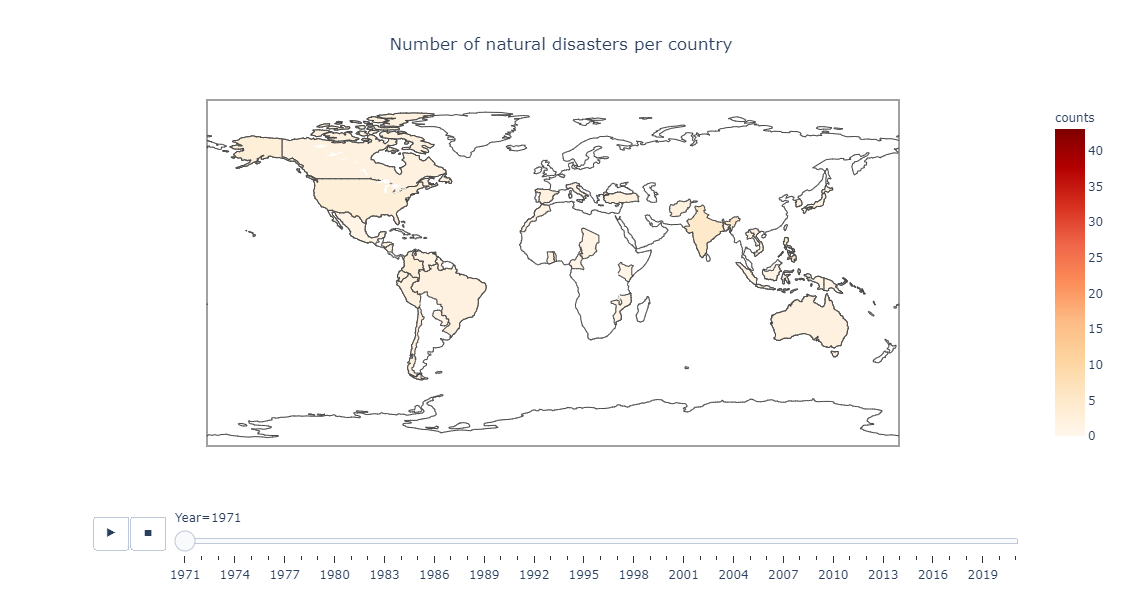

In [162]:
fig = px.choropleth(
    count_by_countries, locations="ISO",
    color="counts",
    hover_name="Country",
    animation_frame="Year",
    title = "Number of natural disasters per country",
    color_continuous_scale=px.colors.sequential.OrRd,
    range_color=[0, count_by_countries['counts'].max()]
)

fig.update_layout(
    width=850,
    height=600,
    autosize=False,
    template="plotly_white",
    title_x=0.5
)


fig.show()

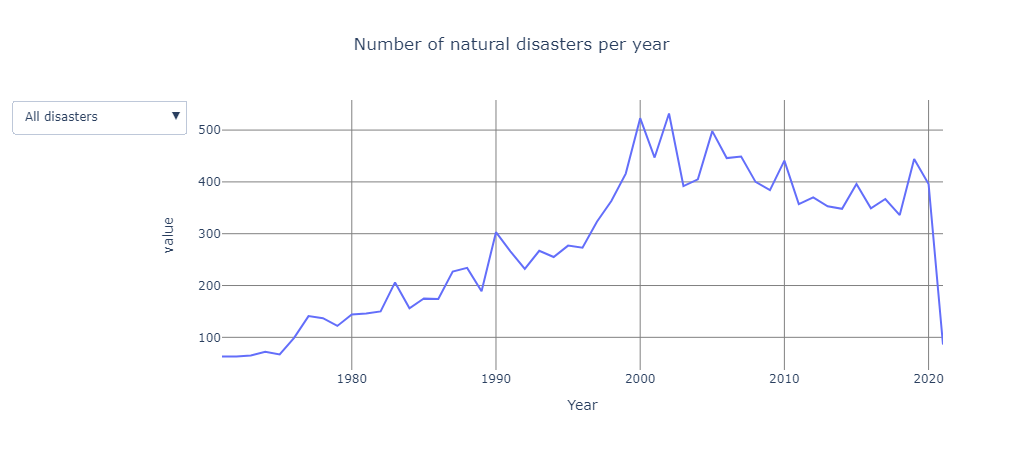

In [175]:
common_kwargs = {'x': "Year", 'y': "value", 'title': "Number of natural disasters per year"}

line_fig = px.line(types_df[types_df['Disaster Type'] == "All"], **common_kwargs)
lineplt_all = px.line(types_df[types_df['Disaster Type'] == "All"], **common_kwargs)
lineplt_filtered = {
    disaster_type: px.line(types_df[types_df['Disaster Type'] == disaster_type], **common_kwargs)
    for disaster_type in types_df['Disaster Type'].unique() if disaster_type != "All"
}
# Add dropdown
line_fig.update_layout(
    updatemenus=[
        dict(
            buttons=list(
                [
                    dict(
                        label="All disasters",
                        method="restyle",
                        args=[{
                            "y": [data.y for data in lineplt_all.data]
                        }]
                    )
                ] + [
                    dict(
                        label=disaster_type,
                        method="restyle",
                        args=[
                            {
                                "y": [data.y for data in lineplt.data],
                            }
                        ]
                    )
                    for disaster_type, lineplt in lineplt_filtered.items()
                ]
            ),
        ),
    ],
    title_x=0.5,
    plot_bgcolor='rgba(0,0,0,0)',
)
line_fig.update_xaxes(gridcolor="grey")
line_fig.update_yaxes(gridcolor="grey")
line_fig.show()

**Idea of improvements :**
- Put all the curves of natural disasters in a logarithmic graph